# <font color='blue'>**Proyecto 3: Modelo de Gaussian Naive Bayes para Apoyar la Toma de Decisiones**</font>

## ¿Comprar o arrendar casa? ¿Qué me conviene?

En este ejercicio, usaremos el algoritmo de Gaussian Naive Bayes para decidir 
si nos conviene:
* Comprar una casa 
* Arrendar una casa

Para ello utilizaremos el algoritmo Naive Bayes.

## <font color='blue'>**Estadística Bayesiana**</font>

La **estadística bayesiana** es un subconjunto del campo de la estadística en la que la evidencia sobre el verdadero estado de las cosas se expresa en términos de grados de creencia (certeza). Esta filosofía de tratar a las creencias como probabilidad es algo natural para los seres humanos. Nosotros la utilizamos constantemente a medida que interactuamos con el mundo y sólo vemos verdades parciales; necesitando reunir pruebas para formar nuestras creencias.

La diferencia fundamental entre la estadística clásica (frecuentista) y la bayesiana es el concepto de probabilidad. Para la estadística clásica es un concepto objetivo, que se encuentra en la naturaleza, mientras que para la estadística bayesiana se encuentra en el observador, siendo así un concepto subjetivo. De este modo, en estadística clásica solo se toma como fuente de información las muestras obtenidas. En el caso bayesiano, sin embargo, además de la muestra también juega un papel fundamental la información previa o externa que se posee en relación a los fenómenos que se tratan de modelar.

La estadística bayesiana ha demostrando su utilidad en ciertas estimaciones basadas en el conocimiento subjetivo a priori y el hecho de permitir revisar esas estimaciones en función de la evidencia empírica es lo que está abriendo nuevas formas de hacer conocimiento. Una aplicación de esto son los clasificadores bayesianos que son frecuentemente usados en implementaciones de filtros de correo basura, que se adaptan con el uso. La estadística bayesiana es un tema muy interesante que merece un artículo en sí mismo.

## <font color='blue'>**Teorema de Bayes**</font>

El teorema de Bayes es una ecuación que describe la relación de probabilidades condicionales de cantidades estadísticas. En clasificación bayesiana estamos interesados en encontrar la probabilidad de que ocurra una “clase” dadas unas características observadas (datos). Lo podemos escribir como $P(Clase|Datos)$. El teorema de Bayes nos dice cómo lo podemos expresar en términos de cantidades que podemos calcular directamente:

$$P(Clase|Datos) = \frac{P(Datos|Clase)*P(Clase)}{P(Datos)}$$

* **Clase** es una salida en particular, por ejemplo “comprar”
* **Datos** son nuestras características, por ejemplo los ingresos, gastos, hijos, etc.
* **P(Clase|Datos)** se llama posterior (y es el resultado que queremos hallar)
* **P(Datos|Clase)** se llama “verosimilitud” (en inglés likelihood)
* **P(Clase)** se llama anterior (pues es una probabilidad que ya tenemos)
* **P(Datos)** se llama probabilidad marginal

Para que quede más claro, ilustremos la aplicación de la inferencia bayesiana con un simple ejemplo del diagnostico médico, uno de los campos dónde más éxito ha tenido. Supongamos que nos hicimos un estudio y nos ha dado positivo para una rara enfermedad que solo el 0,3% de la población mundial tiene. La tasa de efectividad de este estudio es del 99%, es decir, que solo da falsos positivos en el 1% de los casos. *¿Cuán probable es que realmente tengamos la enfermedad?*.

$$P( enfermedad|pos)=\frac{P(pos|enfermedad)P(enfermedad)}{P(pos)}$$

In [3]:
# Ejemplo simple teorema de Bayes aplicado a estimación de un sólo parámetro.
a_priori = 0.003
likelihood = 0.99
evidencia = 0.01

a_posteriori = likelihood * a_priori / evidencia
a_posteriori

0.297

En un principio, nos veríamos tentados a responder que hay un 99% de probabilidad de que tengamos la enfermedad; pero en este caso nos estaríamos olvidando del concepto importante del a priori. Sabemos con anterioridad que la enfermedad es extremadamente rara (solo el 0,3% la tiene); si incluimos esta información previa en nuestro cálculo de probabilidad y aplicamos el teorema de Bayes podemos llegar a una conclusión totalmente distinta.

Si estamos tratando de elegir entre dos clases como por ejemplo “comprar” ó “arrendar”, entonces una manera de tomar la decisión es calcular la tasa de probabilidades a posterior:

$$\frac{P(Comprar|Datos)}{P(Arrendar|Datos)} = \frac{P(Datos|Comprar)*P(Comprar)}{P(Datos|Arrendar)*P(Arrendar)}$$

con esta maniobra, nos deshacemos del denominador de la ecuación anterior $P(Datos)$ el llamado “probabilidad marginal”.

In [2]:
#Seteos previos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

## <font color='green'>**Parte 1: Cargar Archivos**</font>

El archivo "comprar_arrendar.csv" contiene la información para entrenar un modelo para el apoyo a la toma de decisiones. El archivo contiene los datos necesarios para el modelo y las referencias para entender las variables del modelo.

1. Cargue el archivo "comprar_arrendar.csv" en un dataframe que contenga todos los datos del problema
2. Guarde en algún tipo de variables de los vistos en clases, las referencias en los comentarios de cada una de las variables.


In [3]:
df_cv = pd.read_csv('comprar_arrendar.csv', skiprows = 3, header = 1, comment = '#')
df_cv

,ingresos,gastos_comunes,pago_vehiculo,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [6]:
#Solución
# Parte 2: Guardar las referencias a los comentarios

# Guardar comentarios
comentarios = pd.read_csv('comprar_arrendar.csv', nrows = 10)
comentarios = comentarios.loc[:,'#REFERENCIAS'].values
print(*comentarios, sep = "\n")

# ingresos: los ingresos de la familia mensual
# gastos comunes: pagos de luz, agua, gas, etc mensual
# pago vehiculo: si se está pagando cuota por uno o más vehículos, y los gastos en combustible, etc. al mes
# gastos_otros: compra en supermercado y lo necesario para vivir al mes
# ahorros: suma de ahorros dispuestos a usar para la compra de la casa.
# vivienda: precio de la vivienda que quiere comprar esa familia
# estado civil: 0-soltero 1-casados 2-divorciados
# hijos: cantidad de hijos menores y que no trabajan.
# trabajo: 0-sin empleo 1-autónomo (freelance) 2-empleado 3-empresario 4-pareja: autónomos 5-pareja: empleados 6-pareja: autónomo y asalariado 7-pareja:empresario y autónomo 8-pareja: empresarios los dos o empresario y empleado
# comprar: 0-No comprar 1-Comprar


## <font color='green'>**Fin Parte 1**</font>

## <font color='green'>**Parte 2: Explorando los Datos**</font>

1. Utilizando los métodos de agrupación vistos, determine las clases y sus cantidades asociadas para la variable "comprar".
2. Genere una columna "gastos" que englobe todos los gastos de un sujeto (considere que cada fila es un sujeto) y agréguela al dataframe.
3. Genere una nueva columna "financiar" que corresponda al monto que se debe solicitar de crédito hipotecario (asuma que todo el ahorro va para financiar el costo de la vivienda).
4. Genere un nuevo dataframe que no contenga variables de gastos.
5. Realice un análisis de estadística descriptiva del nuevo dataframe generado.

In [7]:
#Solución
#df_compraventa.groupby(by = comprar).size()
# 2.1
#comprar = df_compraventa[df_compraventa['comprar'] == 1]

# Las cantidades de la clase 
print(df_cv.groupby(by = 'comprar').size())

comprar
0    135
1     67
dtype: int64


In [8]:
# 2.1
df_cv['gastos'] = df_cv['gastos_comunes'] + df_cv['pago_vehiculo'] + df_cv['gastos_otros']
print(df_cv['gastos'])

0      1600
1      1496
2      1926
3      1547
4      1606
       ... 
197    1530
198    1775
199    1915
200    1888
201    1644
Name: gastos, Length: 202, dtype: int64


In [9]:
# 2.3
df_cv['financiar'] = df_cv['vivienda'] - df_cv['ahorros'] 
df_cv['financiar']

0      350000
1      593657
2      264316
3      606427
4      307420
        ...  
197    352397
198    258541
199    352460
200    356907
201    245600
Name: financiar, Length: 202, dtype: int64

In [13]:
# 2.4
df_cv_sin_gastos = df_cv.drop(columns = ['gastos_comunes','pago_vehiculo', 'gastos_otros'])
df_cv_sin_gastos

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
...,...,...,...,...,...,...,...,...,...
197,3831,10723,363120,0,0,2,0,1530,352397
198,3961,21880,280421,2,3,8,0,1775,258541
199,3184,35565,388025,1,3,8,0,1915,352460
200,3334,19985,376892,1,2,5,0,1888,356907


In [14]:
# 2.5
df_cv_sin_gastos.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000



## <font color='green'>**Fin Parte 2**</font>

## <font color='blue'>**Clasificador Gaussian Naive Bayes**</font>

Uno de los tipos de clasificadores más populares es el *Gaussian Naive Bayes Classifier*.

Por ejemplo, para el caso que estamos analizando aplicaremos 2 clases (comprar, arrendar) y 3 características: ingresos, ahorros e hijos.

$$posteriori(Comprar) = \frac{P(Comprar)*P(Ingresos|Comprar)P(Ahorros|Comprar)P(Hijos|Comprar)}{Probabilidad Marginal}$$

, y

$$posteriori(Arrendar) = \frac{P(Arrendar)*P(Ingresos|Arrendar)P(Ahorros|Arrendar)P(Hijos|Arrendar)}{Probabilidad Marginal}$$

Pbb a posteriori de comprar es lo que queremos hallar: $$P(Comprar|Datos)$$.

* $P(Comprar)$ es la probabilidad que ya tenemos. Es sencillamente el número de veces que se selecciona $comprar = 1$ en nuestro conjunto de datos, dividido el total de observaciones.

* $P(Ingresos|Comprar)P(Ahorros|Comprar)P(Hijos|Comprar)$ es la **verosimilitud**. Los nombres Gaussian y Naive (ingenuo) del algoritmo vienen de dos suposiciones:
    1. asumimos que las características de la verosimilitud no estan correlacionadas entre ellas. Esto sería que los ingresos sean independientes a la cantidad de hijos y de los ahorros. Como no es siempre cierto y es una suposición ingenua es que aparece en el nombre “naive bayes”
    2. Asumimos que el valor de las características (ingresos, hijos, etc) tendrá una distribución normal (gaussiana). Esto nos permite calcular cada parte $P(Ingresos|Comprar)$ usando la función de probabilidad de densidad normal.

* Probabilidad marginal muchas veces es difícil de calcular, sin embargo, por la ecuación que vimos más arriba, no la necesitaremos para obtener nuestro valor a posteriori. Esto simplifica los cálculos.

## <font color='blue'>**Selección de Características**</font>

Para mejorar nuestros resultados con este algoritmo haremos **Feature Selection**. En vez de utilizar todas las columnas de datos de entrada que tenemos, vamos a utilizar una Clase de SkLearn llamada **SelectKBest** con la que seleccionaremos las 5 mejores características y usaremos sólo esas.

## <font color='green'>**Parte 3: Analizando las Variables**</font>

El feature selection se debe realizar sobre todas las variables del modelo, salvo la variable de salida.

1. Genere un dataframe $X$ que corresponda al dataframe de datos procesado en el punto anterior sin la variable de salida.
2. Genere una variable $y$ corresponda a la variable de salida

In [15]:
X = df_cv_sin_gastos.drop(columns = ['comprar'])
X

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,gastos,financiar
0,6000,50000,400000,0,2,2,1600,350000
1,6745,43240,636897,1,3,6,1496,593657
2,6455,57463,321779,2,1,8,1926,264316
3,7098,54506,660933,0,0,3,1547,606427
4,6167,41512,348932,0,0,3,1606,307420
...,...,...,...,...,...,...,...,...
197,3831,10723,363120,0,0,2,1530,352397
198,3961,21880,280421,2,3,8,1775,258541
199,3184,35565,388025,1,3,8,1915,352460
200,3334,19985,376892,1,2,5,1888,356907


In [16]:
#Solución
X = df_cv_sin_gastos.drop(columns = ['comprar'])
y = df_cv_sin_gastos['comprar']

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


In [17]:
X

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,gastos,financiar
0,6000,50000,400000,0,2,2,1600,350000
1,6745,43240,636897,1,3,6,1496,593657
2,6455,57463,321779,2,1,8,1926,264316
3,7098,54506,660933,0,0,3,1547,606427
4,6167,41512,348932,0,0,3,1606,307420
...,...,...,...,...,...,...,...,...
197,3831,10723,363120,0,0,2,1530,352397
198,3961,21880,280421,2,3,8,1775,258541
199,3184,35565,388025,1,3,8,1915,352460
200,3334,19985,376892,1,2,5,1888,356907


La variable **selected** contienen las mejores características y por lo tanto las que "más aportan". Podemos ver el grado de correlación con las siguientes líneas de código:



```
used_features =

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
```

3. Pase a la variable **used_features** las columnas seleccionadas del dataframe $X$. y ejecute las líneas de código anterior para obtener el mapa de correlación de Pearson.



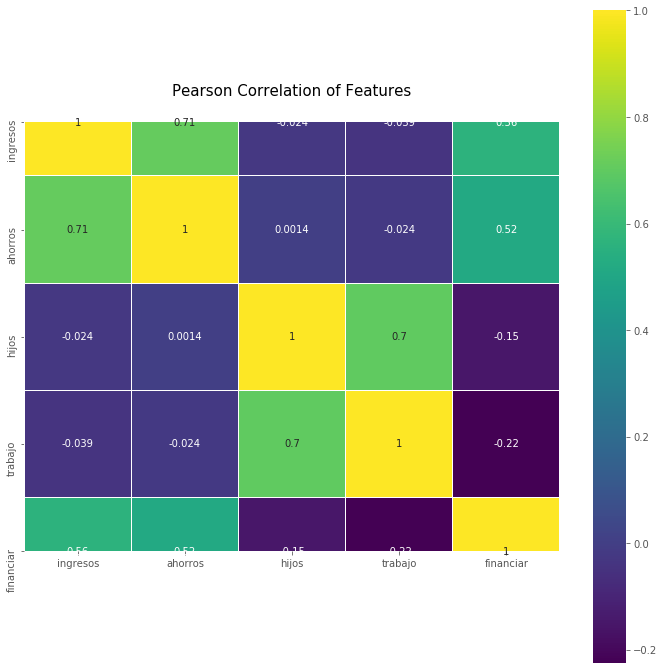

In [166]:
#Solución
used_features = X.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df_cv_sin_gastos[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## <font color='green'>**Fin Parte 3**</font>

## <font color='blue'>**Creamos el modelo de Gaussian Naive Bayes**</font>

Usemos la clase SelectKBest de SkLearn para elegir las 5 mejores características a usar. Pero lo pirmero que debemos hacer es dividir nuestros datos en conjuntos de entrenamiento y prueba.

## <font color='green'>**Parte 4: Construyendo el modelo**</font>

1. Divida su dataframe con los datos del modelo en 2 conjuntos (disjuntos):
  * Entrenamiento, X_train, con el 80% de los datos
  * Prueba, X_test, con el 20% de los datos restantes
2. Para esta misma división genere 2 variables con las salidas del modelo para realizar el entrenamiento, es decir, y_train e y_test.

In [18]:
a = df_cv_sin_gastos.sample(frac = 0.8, random_state = 1).index
b = list(filter(lambda x: False if x in a else True,list(range(0, 202))))

In [243]:
#Solución

a = df_cv_sin_gastos.sample(frac = 0.8, random_state = 1).index
b = list(filter(lambda x: False if x in a else True,list(range(0, 202))))

X_train, X_test = df_cv_sin_gastos.loc[a], df_cv_sin_gastos.loc[b]
y_train = df_cv_sin_gastos['comprar'].loc[a]
y_test = df_cv_sin_gastos['comprar'].loc[b]

In [244]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

In [245]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Prueba: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test))) 

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Prueba: 0.80


In [246]:
# Print Test results
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          X_test.shape[0],
          (y_test != y_pred).sum()
))

Total de Muestras en Test: 40
Fallos: 8


In [247]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  3]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.79      0.69      0.73        16

    accuracy                           0.80        40
   macro avg       0.80      0.78      0.79        40
weighted avg       0.80      0.80      0.80        40



## <font color='green'>**Fin Parte 4**</font>

## <font color='green'>**Parte 5: Nuevas Predicciones**</font>

Genere un nuevo dataframe con información inventada por cada uno de los integrantes del grupo y simule la salida del clasificador.

Para simular, debe usar los siguientes comandos:



```
print(gnb.predict(New_dataframe))
```



In [ ]:
#Solución


## <font color='green'>**Fin Parte 5**</font>